IIC3670 -	Procesamiento de Lenguaje Natural<br>
Primer Semestre 2024<br>


<h1><center>Actividad formativa 3</center></h1>

In [ ]:
import pandas as pd
df = pd.read_csv("film_affinity.csv")
df

In [ ]:
import seaborn as sns
sns.countplot(data=df,x="nota")

____________________________________________________________________________________________________________

## Actividad en clase

Construya un clasificador de sentimiento en **castellano** usando el dataset FilmAffinity y Spacy. Para esto haga lo siguiente:

- Cree la columna 'sentiment' a partir de **nota**. Sentiment debe considerar cuatro clases:
 - 0: Valores 1 y 2
 - 1: valores 3 y 4
 - 2: valores 7 y 8
 - 3: valores 9 y 10

- Preprocese el texto del campo **critica** usando lo que hemos visto en clases.
- Particione el dataset en particiones de train/val/test (80/10/10).
- Ajuste un modelo **word2vec** al dataset usando gensim. Considere un embedding de tamaño 100.
- Cree un clasificador MLP usando los vectores word2vec, manteniendo fijos los pesos de la matriz de embeddings durante el entrenamiento.
- Evalúe el clasificador sobre la particion de test.
- Repita el entrenamiento permitiendo que la red pueda modificar la capa de embeddings. Evalúe los resultados en test.
- Comente resultados.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.


***Tiene hasta el final de la clase.***

_________________________________________________________________________________________________________________

!python3 -m spacy download es_core_news_sm

In [ ]:
!python3 -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Preprocesamiento

In [ ]:
import string
import re
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

nlp = spacy.load("es_core_news_sm") # a spanish-based nlp model
REGX_USERNAME = r"@[A-Za-z0-9$-_@.&+]+"

def preprocessing(text):
  text = text.lower()
  text = re.sub(REGX_USERNAME, ' ', text)
  tokens = [token.text for token in nlp(text)]
  tokens = [t for t in tokens if t not in STOP_WORDS and t not in string.punctuation and len(t) > 2]
  tokens = [t for t in tokens if not t.isdigit()]

  return " ".join(tokens)


df["text_clean"] = df["critica"].apply(preprocessing)

In [ ]:
def codificar(x):
#  x= int(x)
  if x <=2:
    y=0
  elif x<=4:
    y=1
  elif x<=8:
    y=2
  else:
    y=3
  return y

In [ ]:
df["sentiment"] = df.nota.apply(codificar)

In [ ]:
df.head()

,critica,nota,url,text_clean,sentiment
0,"Bueno, bajo mi gusto, otro fracaso más de DC. ...",3,https://www.filmaffinity.com/es/reviews/1/4208...,gusto fracaso empezó año aves presa acaba año ...,1
1,Es tan terrible que podría funcionar como paro...,1,https://www.filmaffinity.com/es/reviews/1/4208...,terrible funcionar parodia sobreactuada record...,0
2,Tengo una tradición desde hace más de 5 años. ...,2,https://www.filmaffinity.com/es/reviews/1/4208...,tradición años diciembre cine blockbuster peli...,0
3,No entiendo como nadie tiene la cara de presen...,1,https://www.filmaffinity.com/es/reviews/1/4208...,entiendo cara presentar película entiendo crít...,0
4,La primera entrega de Wonder Woman (2017) no m...,4,https://www.filmaffinity.com/es/reviews/1/4208...,entrega wonder woman pareció maravilla contrar...,1


<Axes: xlabel='sentiment', ylabel='count'>

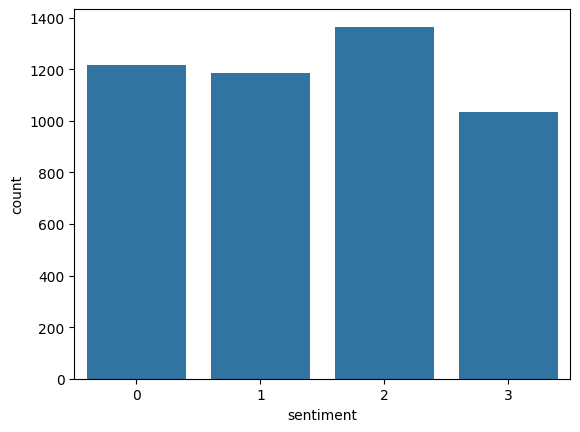

In [ ]:
import seaborn as sns
sns.countplot(data=df,x="sentiment")

#Crear train/val/test

In [ ]:
from sklearn.model_selection import train_test_split
X = df["text_clean"]
y = df["sentiment"]

In [ ]:
#Separación entre train (90%) y test (10%) desde el conjunto completo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Separación entre train y val desde el conjunto train definido anteriormente
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=480, random_state=42)

print(f"X_train: {X_train.shape[0]}")
print(f"y_train: {y_train.shape[0]} \n")
print(f"X_val: {X_val.shape[0]}")
print(f"y_val: {y_val.shape[0]}\n")
print(f"X_test: {X_test.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 3840
y_train: 3840 

X_val: 480
y_val: 480

X_test: 480
y_test: 480


In [ ]:
import nltk
nltk.download("punkt")

from nltk.tokenize import RegexpTokenizer, sent_tokenize

tokenizer = RegexpTokenizer('[\'a-zA-Z]+')
def tokenize(document):
    words = []
    for sentence in sent_tokenize(document):
        tokens = [t.lower() for t in tokenizer.tokenize(sentence) if len(t) > 2]
        words += tokens
    return words

corpus_words = []

for raw_text in X_train.to_list():
    words = tokenize(raw_text)
    corpus_words.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
corpus_words[0]

['mundo',
 'destaca',
 'bondades',
 'padrino',
 'har',
 'lista',
 'malo',
 'nico',
 'malo',
 'pel',
 'cula',
 'veas',
 'estar',
 'condenado',
 'vida',
 'revisitarla',
 'frecuentemente',
 'pilles',
 'pping',
 'alguien',
 'diga',
 'apetece',
 'padrino',
 'quedar',
 'pegado',
 'butaca',
 'horas',
 'remedio',
 'cosa',
 'mala',
 'quedas',
 'ganas',
 'cosas',
 'sonny',
 'clemenza',
 'tessio',
 'fredo',
 'barzini',
 'neri',
 'luca',
 'brasi',
 'gigantescos',
 'carism',
 'ticos',
 'personajes',
 'secundarios',
 'pueblan',
 'trama',
 'pel',
 'cula',
 'excusas',
 'verla',
 'auna',
 'cine',
 'calidad',
 'entretenimiento',
 'forma',
 'igualada',
 'empujar',
 'resto',
 'trilog',
 'excelentes',
 'pel',
 'cula',
 'tiempos']

Word2Vec

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=corpus_words, vector_size=100, window=4, min_count=1, sg=1)

In [ ]:
model.wv.similar_by_word('excelentes')

[('brillantes', 0.9831746220588684),
 ('cumplen', 0.9819462299346924),
 ('manejo', 0.9815715551376343),
 ('destaco', 0.98123699426651),
 ('impresionantes', 0.9796738624572754),
 ('perfectos', 0.9794450402259827),
 ('coreograf', 0.9786301255226135),
 ('notables', 0.978601336479187),
 ('iluminaci', 0.9785175323486328),
 ('destacan', 0.9780804514884949)]

In [ ]:
import numpy as np
vectors_w2v = np.asarray(model.wv.vectors)
labels_w2v = np.asarray(model.wv.index_to_key)

#Keras

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
max_tokens = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train.to_list()), maxlen=max_tokens, padding="post", truncating="post")
X_val_vect  = pad_sequences(tokenizer.texts_to_sequences(X_val.to_list()), maxlen=max_tokens, padding="post", truncating="post")
X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test.to_list()), maxlen=max_tokens, padding="post", truncating="post")

print(f"train: {X_train_vect.shape} \n val: {X_val_vect.shape} \n test: {X_test_vect.shape}")

train: (3840, 50) 
 val: (480, 50) 
 test: (480, 50)


In [ ]:
len(tokenizer.index_word.keys())

51105

In [ ]:
embed_len = 100

w2v_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

for idx, word in tokenizer.index_word.items():
    if word in labels_w2v:
        w2v_embeddings[idx] = vectors_w2v[int(np.where(labels_w2v == word)[0][0])]

In [ ]:
w2v_embeddings.shape

(51106, 100)

##Pesos fijos

In [ ]:
import tensorflow

from keras.models import Model
from keras.layers import Dense, Embedding, Input

inputs = Input(shape=(max_tokens, ))
embeddings_layer = Embedding(input_dim=len(tokenizer.index_word)+1, output_dim=embed_len,
                             input_length=max_tokens, trainable=False, weights=[w2v_embeddings])
dense1 = Dense(128, activation="relu")
dense2 = Dense(64, activation="relu")
dense3 = Dense(4, activation="softmax")

x = embeddings_layer(inputs)
x = tensorflow.reduce_mean(x, axis=1)
x = dense1(x)
x = dense2(x)
outputs = dense3(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 100)           5110600   
                                                                 
 tf.math.reduce_mean (TFOpL  (None, 100)               0         
 ambda)                                                          
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                             

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_vect, y_train, batch_size=32, epochs=15, validation_data=(X_val_vect, y_val))

Epoch 1/15
120/120 [==============================] - 1s 4ms/step - loss: 1.3642 - accuracy: 0.3195 - val_loss: 1.3110 - val_accuracy: 0.4208
Epoch 2/15
120/120 [==============================] - 0s 3ms/step - loss: 1.3033 - accuracy: 0.3982 - val_loss: 1.2744 - val_accuracy: 0.4042
Epoch 3/15
120/120 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.4096 - val_loss: 1.2370 - val_accuracy: 0.4354
Epoch 4/15
120/120 [==============================] - 0s 3ms/step - loss: 1.2497 - accuracy: 0.4268 - val_loss: 1.2130 - val_accuracy: 0.4437
Epoch 5/15
120/120 [==============================] - 0s 3ms/step - loss: 1.2389 - accuracy: 0.4388 - val_loss: 1.1882 - val_accuracy: 0.4625
Epoch 6/15
120/120 [==============================] - 0s 3ms/step - loss: 1.2332 - accuracy: 0.4333 - val_loss: 1.1915 - val_accuracy: 0.4708
Epoch 7/15
120/120 [==============================] - 0s 3ms/step - loss: 1.2299 - accuracy: 0.4333 - val_loss: 1.1801 - val_accuracy: 0.4625
Epoch 

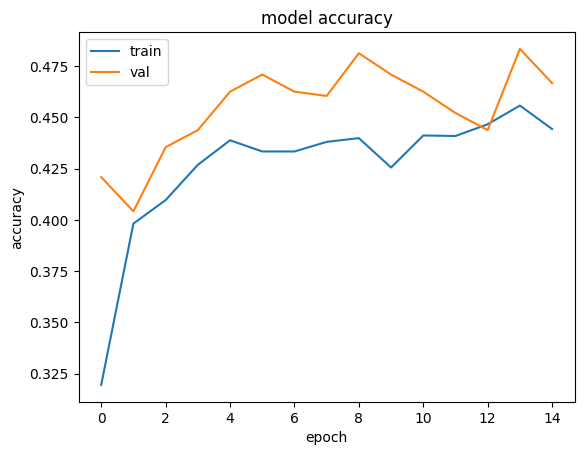

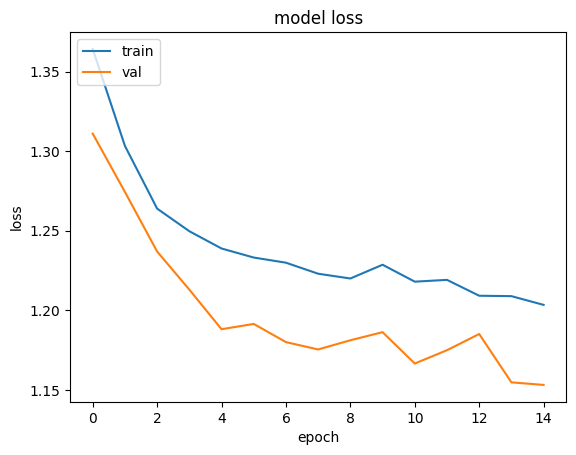

In [ ]:
import matplotlib.pyplot as plt
# Para accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Para función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test = np.asarray(y_test)
y_pred_1 = model.predict(X_test_vect).argmax(axis=-1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred_1))

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.58      0.54       132
           1       0.43      0.43      0.43       116
           2       0.45      0.55      0.49       125
           3       0.49      0.24      0.32       107

    accuracy                           0.46       480
   macro avg       0.46      0.45      0.45       480
weighted avg       0.47      0.46      0.45       480



##Pesos entrenables

In [ ]:
import tensorflow

from keras.models import Model
from keras.layers import Dense, Embedding, Input

inputs = Input(shape=(max_tokens, ))
embeddings_layer = Embedding(input_dim=len(tokenizer.index_word)+1, output_dim=embed_len,
                             input_length=max_tokens, trainable=True, weights=[w2v_embeddings])
dense1 = Dense(128, activation="relu")
dense2 = Dense(64, activation="relu")
dense3 = Dense(4, activation="softmax")

x = embeddings_layer(inputs)
x = tensorflow.reduce_mean(x, axis=1)
x = dense1(x)
x = dense2(x)
outputs = dense3(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 100)           5110600   
                                                                 
 tf.math.reduce_mean_1 (TFO  (None, 100)               0         
 pLambda)                                                        
                                                                 
 dense_3 (Dense)             (None, 128)               12928     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                           

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_vect, y_train, batch_size=32, epochs=15, validation_data=(X_val_vect, y_val))

Epoch 1/15
120/120 [==============================] - 10s 76ms/step - loss: 1.3391 - accuracy: 0.3464 - val_loss: 1.2257 - val_accuracy: 0.4667
Epoch 2/15
120/120 [==============================] - 8s 65ms/step - loss: 1.0642 - accuracy: 0.5529 - val_loss: 1.0788 - val_accuracy: 0.5188
Epoch 3/15
120/120 [==============================] - 8s 70ms/step - loss: 0.6198 - accuracy: 0.7807 - val_loss: 1.0981 - val_accuracy: 0.5396
Epoch 4/15
120/120 [==============================] - 8s 67ms/step - loss: 0.2244 - accuracy: 0.9461 - val_loss: 1.3134 - val_accuracy: 0.5417
Epoch 5/15
120/120 [==============================] - 8s 67ms/step - loss: 0.0581 - accuracy: 0.9937 - val_loss: 1.4963 - val_accuracy: 0.5250
Epoch 6/15
120/120 [==============================] - 8s 70ms/step - loss: 0.0199 - accuracy: 0.9992 - val_loss: 1.6532 - val_accuracy: 0.5188
Epoch 7/15
120/120 [==============================] - 8s 65ms/step - loss: 0.0100 - accuracy: 0.9995 - val_loss: 1.7740 - val_accuracy: 0.518

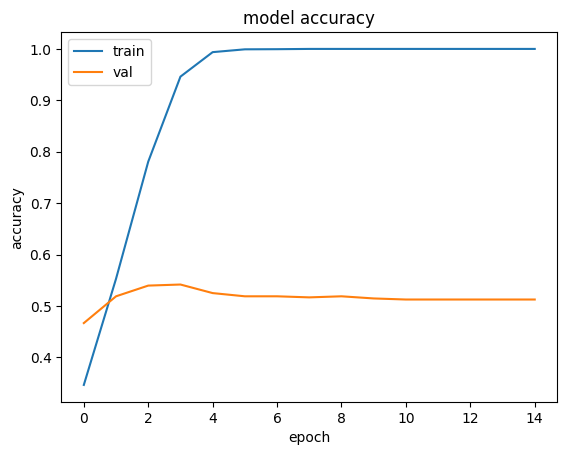

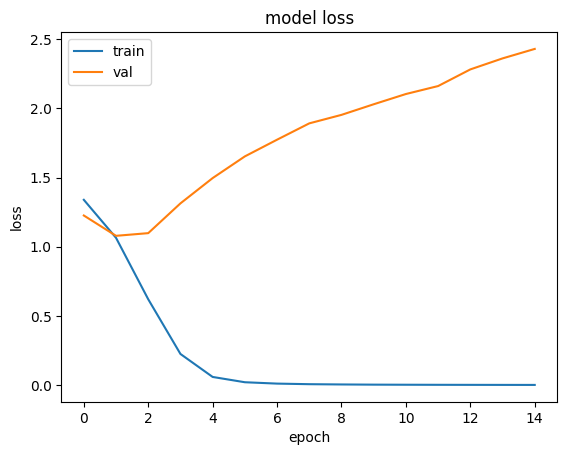

In [ ]:
import matplotlib.pyplot as plt
# Para accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Para función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_test = np.asarray(y_test)
y_pred = model.predict(X_test_vect).argmax(axis=-1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       132
           1       0.44      0.66      0.53       116
           2       0.50      0.52      0.51       125
           3       0.51      0.37      0.43       107

    accuracy                           0.51       480
   macro avg       0.52      0.51      0.50       480
weighted avg       0.53      0.51      0.51       480

